<a href="https://colab.research.google.com/github/LaraDondossola/Projeto_estatistica_aplicada/blob/main/Media_redacao_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
file_name = "notas.csv"
df = pd.read_csv(file_name, sep=';')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Mapear os códigos de dependência
dependency_map = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
df['TIPO_ESCOLA'] = df['TP_DEPENDENCIA_ADM_ESC'].map(dependency_map)

In [ ]:
# Calcular a média da nota de redação para cada tipo de escola
avg_scores = df.groupby('TIPO_ESCOLA')['NU_NOTA_REDACAO'].mean().sort_values(ascending=False)

In [ ]:
# Definir um mapa de cores para o gráfico de barras
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Cores distintas

In [ ]:
# Obter os rótulos na ordem das médias calculadas
labels = avg_scores.index

In [ ]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

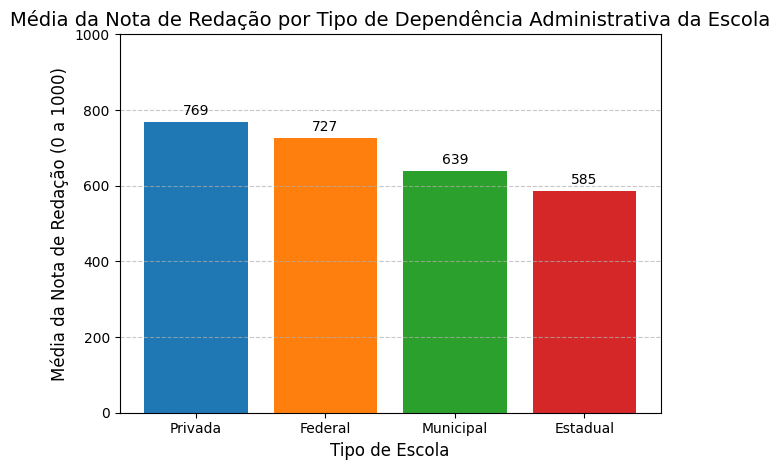

In [ ]:
# Apenas usamos as cores de acordo com a quantidade de labels que temos, que é 4.
bars = plt.bar(labels, avg_scores.values, color=colors[:len(labels)])

# Definir os limites do eixo Y de 0 a 1000
plt.ylim(0, 1000)

# Adicionar títulos e rótulos
plt.title('Média da Nota de Redação por Tipo de Dependência Administrativa da Escola', fontsize=14)
plt.xlabel('Tipo de Escola', fontsize=12)
plt.ylabel('Média da Nota de Redação (0 a 1000)', fontsize=12)

# Adicionar os valores médios no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10,
             f'{yval:.0f}', ha='center', va='bottom', fontsize=10)

# Adicionar uma grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Salvar o gráfico
plt.tight_layout()
plt.savefig('media_nota_redacao_por_tipo_escola.png')